## 1. Import libraries

In [47]:
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,10.)})
sns.set_style("whitegrid")

## 2. Import Data

In [15]:
train = pd.read_csv("../Data/train.csv")

In [16]:
train

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.14,Ideal,G,VVS2,61.0,56.0,6.74,6.76,4.12,9013
1,1,0.76,Ideal,H,VS2,62.7,57.0,5.86,5.82,3.66,2692
2,2,0.84,Ideal,G,VS1,61.4,56.0,6.04,6.15,3.74,4372
3,3,1.55,Ideal,H,VS1,62.0,57.0,7.37,7.43,4.59,13665
4,4,0.30,Ideal,G,SI2,61.9,57.0,4.28,4.31,2.66,422
...,...,...,...,...,...,...,...,...,...,...,...
40450,40450,0.40,Ideal,E,VVS1,60.8,57.0,4.79,4.82,2.92,1278
40451,40451,0.52,Ideal,J,SI2,61.6,55.0,5.16,5.19,3.19,924
40452,40452,1.00,Very Good,E,SI1,59.4,63.0,6.47,6.42,3.83,5322
40453,40453,0.57,Very Good,E,VS1,62.9,56.0,5.31,5.35,3.35,1942


In [17]:
train.shape

(40455, 11)

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       40455 non-null  int64  
 1   carat    40455 non-null  float64
 2   cut      40455 non-null  object 
 3   color    40455 non-null  object 
 4   clarity  40455 non-null  object 
 5   depth    40455 non-null  float64
 6   table    40455 non-null  float64
 7   x        40455 non-null  float64
 8   y        40455 non-null  float64
 9   z        40455 non-null  float64
 10  price    40455 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 3.4+ MB


In [19]:
train.columns

Index(['id', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y',
       'z', 'price'],
      dtype='object')

In [24]:
train.isna().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [27]:
train.carat.unique()

array([1.14, 0.76, 0.84, 1.55, 0.3 , 0.4 , 1.52, 1.13, 0.41, 0.24, 0.81,
       1.2 , 1.24, 1.  , 0.51, 0.38, 0.46, 0.35, 1.02, 1.07, 1.22, 0.91,
       0.54, 2.03, 0.32, 1.5 , 1.21, 0.27, 1.01, 0.31, 0.5 , 0.8 , 2.01,
       0.7 , 0.44, 0.55, 0.53, 0.71, 0.42, 2.22, 1.11, 1.05, 0.23, 1.04,
       1.56, 1.27, 0.36, 2.1 , 0.25, 1.53, 0.75, 0.93, 0.28, 0.33, 1.08,
       0.9 , 0.52, 0.78, 1.88, 1.09, 1.8 , 1.12, 2.17, 2.4 , 0.61, 1.37,
       0.34, 0.37, 1.51, 0.83, 0.73, 1.03, 1.25, 0.92, 1.06, 1.67, 0.56,
       1.32, 0.72, 0.63, 2.51, 2.14, 1.59, 0.39, 2.06, 1.23, 2.04, 2.13,
       1.7 , 0.6 , 0.58, 0.59, 0.43, 1.16, 0.57, 0.64, 1.61, 2.54, 0.79,
       0.82, 2.28, 1.31, 1.19, 1.54, 0.45, 0.74, 2.15, 1.34, 2.  , 0.94,
       1.41, 0.99, 1.29, 1.35, 1.78, 0.98, 1.17, 0.65, 1.71, 1.82, 2.05,
       1.97, 0.49, 4.01, 0.97, 0.69, 0.29, 2.46, 2.25, 1.38, 1.3 , 1.15,
       1.83, 1.57, 1.75, 0.21, 0.66, 1.33, 0.85, 1.1 , 2.12, 2.2 , 0.88,
       0.77, 2.67, 2.08, 0.87, 2.19, 0.89, 1.26, 0.

In [28]:
train.cut.unique()

array(['Ideal', 'Fair', 'Very Good', 'Premium', 'Good'], dtype=object)

In [29]:
train.cut.value_counts()

Ideal        16193
Premium      10301
Very Good     9030
Good          3710
Fair          1221
Name: cut, dtype: int64

In [30]:
train.color.unique()

array(['G', 'H', 'F', 'J', 'E', 'I', 'D'], dtype=object)

In [31]:
train.color.value_counts()

G    8459
E    7346
F    7174
H    6273
D    5019
I    4065
J    2119
Name: color, dtype: int64

In [32]:
train.clarity.unique()

array(['VVS2', 'VS2', 'VS1', 'SI2', 'SI1', 'VVS1', 'IF', 'I1'],
      dtype=object)

In [33]:
train.clarity.value_counts()

SI1     9746
VS2     9175
SI2     6912
VS1     6137
VVS2    3822
VVS1    2732
IF      1367
I1       564
Name: clarity, dtype: int64

## Asignamos el valor de las variables en un orden de acuerdo al precio que tienen los colores, la calidad y la claridad

In [38]:
dic_para_cut = {"Ideal": 2,
                "Fair": 5,
                "Very Good": 3,
                "Premium":1,
                "Good":4,
}

In [39]:
dic_para_color = {"D":1,
                "E":2,
                "F":3,
                "G":4,
                "H":5,
                "I":6,
                "J":7
}

In [40]:
dic_para_clarity = {"IF":1,
                "VVS1":2,
                "VVS2":3,
                "VS1":4,
                "VS2":5,
                "SI1":6,
                "SI2":7,
                "I1":8
}

In [42]:
train.cut = train.cut.map(dic_para_cut)

In [43]:
train.color = train.color.map(dic_para_color)

In [44]:
train.clarity = train.clarity.map(dic_para_clarity)

In [45]:
train.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.14,2,4,3,61.0,56.0,6.74,6.76,4.12,9013
1,1,0.76,2,5,5,62.7,57.0,5.86,5.82,3.66,2692
2,2,0.84,2,4,4,61.4,56.0,6.04,6.15,3.74,4372
3,3,1.55,2,5,4,62.0,57.0,7.37,7.43,4.59,13665
4,4,0.30,2,4,7,61.9,57.0,4.28,4.31,2.66,422


In [48]:
corr = train.corr()
corr

,id,carat,cut,color,clarity,depth,table,x,y,z,price
id,1.000000,-0.003349,0.002007,-0.001828,-0.000274,0.007690,-0.007495,-0.003985,-0.003997,-0.003010,-0.004065
carat,-0.003349,1.000000,0.021996,0.292673,0.352151,0.025563,0.181437,0.976119,0.968747,0.969643,0.921128
cut,0.002007,0.021996,1.000000,-0.005301,0.067268,0.312526,0.067102,0.007702,0.016801,0.051596,-0.028166
color,-0.001828,0.292673,-0.005301,1.000000,-0.026766,0.049141,0.023844,0.271814,0.269470,0.274945,0.172244
clarity,-0.000274,0.352151,0.067268,-0.026766,1.000000,0.070941,0.156182,0.371832,0.364112,0.373575,0.145062
depth,0.007690,0.025563,0.312526,0.049141,0.070941,1.000000,-0.297741,-0.028409,-0.031153,0.093987,-0.015052
table,-0.007495,0.181437,0.067102,0.023844,0.156182,-0.297741,1.000000,0.195592,0.187326,0.154194,0.127691
x,-0.003985,0.976119,0.007702,0.271814,0.371832,-0.028409,0.195592,1.000000,0.991276,0.986062,0.884874
y,-0.003997,0.968747,0.016801,0.269470,0.364112,-0.031153,0.187326,0.991276,1.000000,0.980160,0.880575
z,-0.003010,0.969643,0.051596,0.274945,0.373575,0.093987,0.154194,0.986062,0.980160,1.000000,0.875011


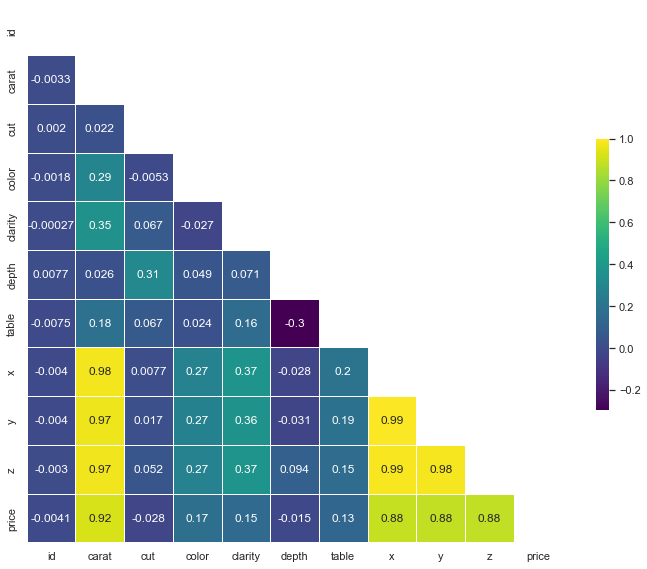

In [56]:
mascara5 = np.triu(np.ones_like(corr, dtype=bool)) # generamos la máscara para la triangular superior
color_map = sns.diverging_palette(0, 10, as_cmap=True) # paleta de colores
sns.heatmap(corr,
            mask = mascara5,
            cmap='viridis',
            square=True, #que los datos se vean como cuadrados
            linewidth=0.5, #ancho de línea
            vmax=1,
            cbar_kws={"shrink": .5}, #barra lateral,
            annot=True
);

In [60]:
train.drop(columns=["x","y","z"], inplace = True)

In [61]:
corr2 = train.corr()
corr2

,id,carat,cut,color,clarity,depth,table,price
id,1.000000,-0.003349,0.002007,-0.001828,-0.000274,0.007690,-0.007495,-0.004065
carat,-0.003349,1.000000,0.021996,0.292673,0.352151,0.025563,0.181437,0.921128
cut,0.002007,0.021996,1.000000,-0.005301,0.067268,0.312526,0.067102,-0.028166
color,-0.001828,0.292673,-0.005301,1.000000,-0.026766,0.049141,0.023844,0.172244
clarity,-0.000274,0.352151,0.067268,-0.026766,1.000000,0.070941,0.156182,0.145062
depth,0.007690,0.025563,0.312526,0.049141,0.070941,1.000000,-0.297741,-0.015052
table,-0.007495,0.181437,0.067102,0.023844,0.156182,-0.297741,1.000000,0.127691
price,-0.004065,0.921128,-0.028166,0.172244,0.145062,-0.015052,0.127691,1.000000


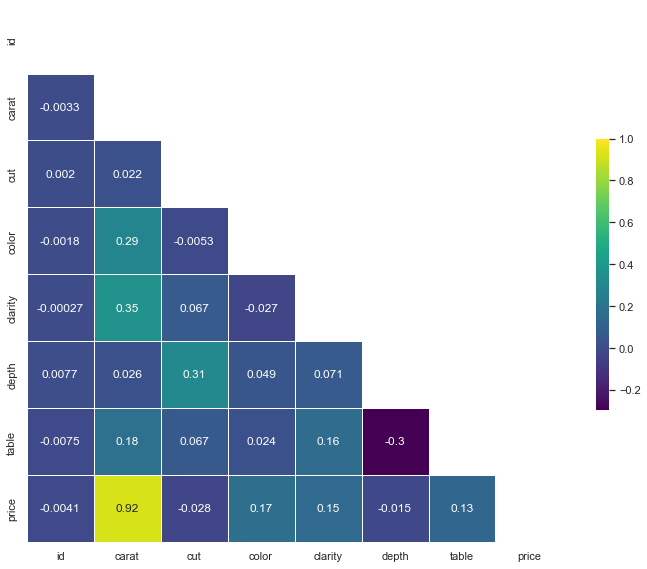

In [62]:
mascara5 = np.triu(np.ones_like(corr2, dtype=bool)) # generamos la máscara para la triangular superior
color_map = sns.diverging_palette(0, 10, as_cmap=True) # paleta de colores
sns.heatmap(corr2,
            mask = mascara5,
            cmap='viridis',
            square=True, #que los datos se vean como cuadrados
            linewidth=0.5, #ancho de línea
            vmax=1,
            cbar_kws={"shrink": .5}, #barra lateral,
            annot=True
);

In [65]:
train.to_csv("../Data/cleaning_train.csv", index=False)